In [1]:
# Chargement des bibliothèques utiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Affichage des graphiques dans le notebook
%matplotlib inline

# Configuration générale
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)


In [5]:
# Chargement des données
df = pd.read_csv("C:/Users/Hermann/Documents/MES_TRAVAUX\DETECTION DE LA FRAUDE/detection_fraude_bancaire _sfdffd/data/sfdffd.csv")  # remplace par ton vrai nom de fichier
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
# Dimensions du jeu de données
print(f"Nombre d'observations : {df.shape[0]}")
print(f"Nombre de variables : {df.shape[1]}")


Nombre d'observations : 6362620
Nombre de variables : 11


In [7]:
# Types de variables et données manquantes
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
# Statistiques descriptives
df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
# Proportions des classes cibles (fraude / non fraude)
df['type'].value_counts(normalize=True) * 100

type
CASH_OUT    35.166331
PAYMENT     33.814608
CASH_IN     21.992261
TRANSFER     8.375622
DEBIT        0.651178
Name: proportion, dtype: float64

In [10]:
# repartitions des fraudes
df['isFraud'].value_counts(normalize=True) * 100  # % de fraudes


isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64

In [11]:
# type d'operation frauduleuse
df[df['isFraud'] == 1]['type'].value_counts()


type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

Text(0.5, 1.0, "Montant des transactions selon qu'elles soient frauduleuses ou non")

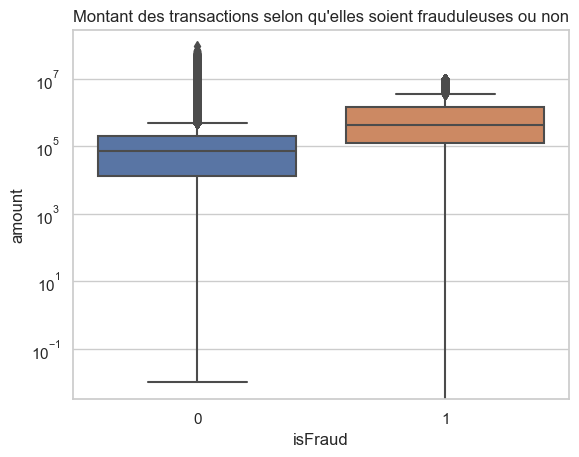

In [12]:
# visualisation  
import seaborn as sns
import matplotlib.pyplot as plt

# Répartition du montant des transactions frauduleuses vs normales
sns.boxplot(x='isFraud', y='amount', data=df)
plt.yscale('log')  # car les montants ont probablement de fortes variations
plt.title("Montant des transactions selon qu'elles soient frauduleuses ou non")


<Axes: >

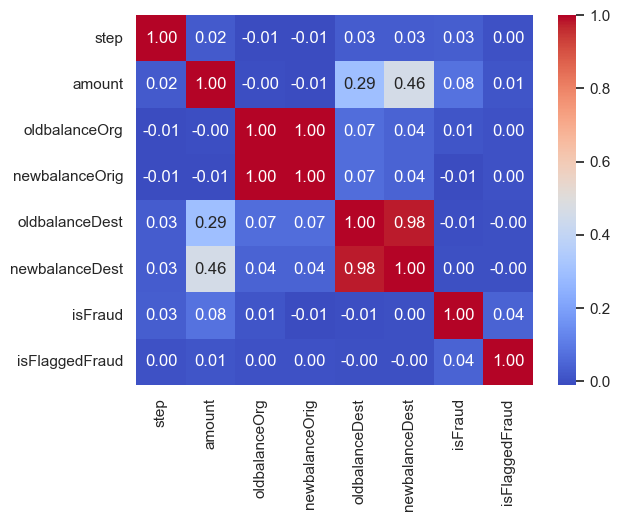

In [13]:
# exemple de correllation 
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
